 МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Зухба Анастасия, a__l@mail.ru

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas
import numpy as np

# Критерии качества моделей

Внутренний критерий оценивает качество на обучении $X^l$, а внешний оценивает качество <<вне обучения>>,
    например, по отложенной  (hold-out) контрольной выборке $X^k$.

In [3]:
from sklearn import metrics

### Метрики качества регрессии

In [4]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale

data = load_boston()

data.data = scale(data.data)

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

In [5]:
from sklearn.linear_model import Ridge

In [6]:
regr = Ridge()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

In [7]:
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred))
print 'MAE:', metrics.mean_absolute_error(y_test, pred)
print 'R2:', metrics.r2_score(y_test, pred)

RMSE: 4.9451077702
MAE: 3.55293603911
R2: 0.694050941389


#### Как распределена ошибка по объектам?

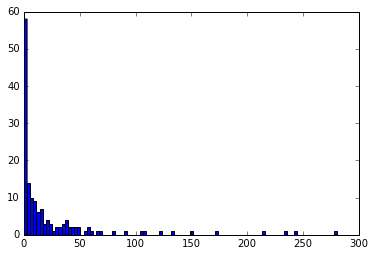

In [8]:
import matplotlib.pyplot as plt

quad_errors = np.power(pred - y_test, 2.0)
plt.hist(quad_errors, bins=100)
plt.show()

In [9]:
idx = np.argmax(quad_errors)
X_test[idx, :]

array([ 1.77186037, -0.48772236,  1.01599907, -0.27259857,  0.36544404,
       -2.36013855,  1.11749449, -1.06537007,  1.66124525,  1.53092646,
        0.80657583, -3.59503802,  3.04414519])

In [10]:
print np.min(metrics.pairwise.euclidean_distances(X_train, X_test[idx]))

2.1477270024


/Users/FlareN/shad-env/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [11]:
# среднее расстояние от тестового объекта до обучающей выборки
print np.min(metrics.pairwise.euclidean_distances(X_train, X_test), axis=0).mean()
print np.min(metrics.pairwise.euclidean_distances(X_train, X_test), axis=0).std()

0.866870928353
0.522897798846


Возможно, в обучающей выборке не было объектов, похожих на данный.

### Метрики качества классификации

THE CARAVAN INSURANCE DATA

http://kdd.ics.uci.edu/databases/tic/tic.html

Задача: предсказать, купит ли человек страховку

In [12]:
data = pandas.read_csv('http://kdd.ics.uci.edu/databases/tic/ticdata2000.txt', sep='\t', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


Данные несбалансированные — мало кто покупает страховку

In [13]:
data.shape

(5822, 86)

In [14]:
data.iloc[:, -1].value_counts()

0    5474
1     348
Name: 85, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(scale(data.iloc[:, 1:-1].astype(np.float)),
                                                    data.iloc[:, -1],
                                                    test_size=0.3)

In [16]:
print 'positive class ration in train:', np.mean(y_train)
print 'positive class ration in test:', np.mean(y_test)

positive class ration in train: 0.0598773006135
positive class ration in test: 0.0595306239267


In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)[:, 1]

In [18]:
print clf.predict_proba(X_test)

[[ 0.97298113  0.02701887]
 [ 0.98280021  0.01719979]
 [ 0.95885173  0.04114827]
 ..., 
 [ 0.90969512  0.09030488]
 [ 0.70853849  0.29146151]
 [ 0.85691055  0.14308945]]


In [19]:
pred_binary = (pred > 0.5).astype(np.int)
print 'Accuracy:', metrics.accuracy_score(y_test, pred_binary)
print 'Accuracy of constant classifier:', metrics.accuracy_score(y_test, np.zeros(y_test.shape))

Accuracy: 0.939324556382
Accuracy of constant classifier: 0.940469376073


In [20]:
print 'Precision:', metrics.precision_score(y_test, pred_binary)
print 'Recall:', metrics.recall_score(y_test, pred_binary)
print 'F1:', metrics.f1_score(y_test, pred_binary)

Precision: 0.375
Recall: 0.0288461538462
F1: 0.0535714285714


In [21]:
print 'AUC-ROC:', metrics.roc_auc_score(y_test, pred)
print 'AUC-PR:', metrics.average_precision_score(y_test, pred)

AUC-ROC: 0.71412226696
AUC-PR: 0.145039511719


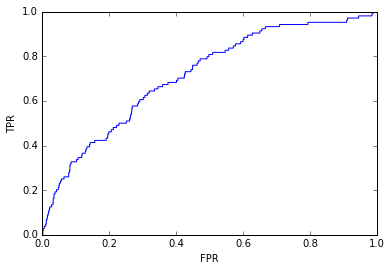

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

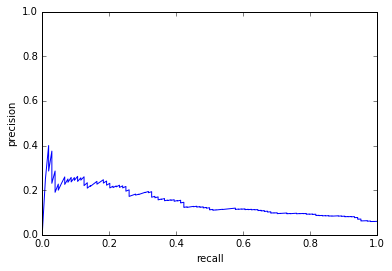

In [23]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pred)
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [24]:
print metrics.classification_report(y_test, pred_binary)

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      1643
          1       0.38      0.03      0.05       104

avg / total       0.91      0.94      0.91      1747



#### Попробуем RandomForest

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)[:, 1]

In [26]:
pred_binary = (pred > 0.5).astype(np.int)
print 'Accuracy:', metrics.accuracy_score(y_test, pred_binary)
print 'Accuracy of constant classifier:', metrics.accuracy_score(y_test, np.zeros(y_test.shape))
print 'Precision:', metrics.precision_score(y_test, pred_binary)
print 'Recall:', metrics.recall_score(y_test, pred_binary)
print 'F1:', metrics.f1_score(y_test, pred_binary)
print 'AUC-ROC:', metrics.roc_auc_score(y_test, pred)
print 'AUC-PR:', metrics.average_precision_score(y_test, pred)

Accuracy: 0.921579851173
Accuracy of constant classifier: 0.940469376073
Precision: 0.116279069767
Recall: 0.0480769230769
F1: 0.0680272108844
AUC-ROC: 0.613968350578
AUC-PR: 0.0947201729031


(Random Forest не всегда лучше линейной модели)

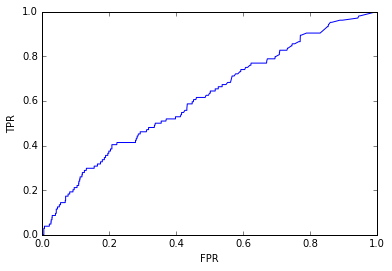

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

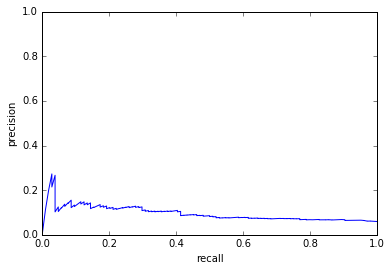

In [28]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pred)
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

### Кросс-валидация

In [29]:
data = load_boston()

data.data = scale(data.data)

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
search_range = np.arange(1, 10)
for k in search_range:
    regr = KNeighborsRegressor(n_neighbors=k, weights='distance')
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    print k, metrics.mean_squared_error(y_test, pred)

1 18.8886842105
2 11.1577537941
3 11.3474087542
4 10.2554491649
5 10.0193329765
6 9.67598853669
7 10.1868882751
8 10.5139732887
9 11.1208808622


In [32]:
from sklearn.cross_validation import ShuffleSplit, KFold, cross_val_score

In [33]:
cv = ShuffleSplit(X_train.shape[0], n_iter=1, random_state=241, 
                  test_size=0.2)
for k in search_range:
    regr = KNeighborsRegressor(n_neighbors=k, weights='distance')
    print k, -cross_val_score(regr, X_train, y_train, cv=cv, scoring='mean_squared_error')

1 [ 31.17971831]
2 [ 29.54189499]
3 [ 25.37454399]
4 [ 22.52039692]
5 [ 20.03729738]
6 [ 18.7719952]
7 [ 18.59436894]
8 [ 17.76804703]
9 [ 17.95292367]


In [34]:
def do_kfold(k):
    cv = KFold(X_train.shape[0], n_folds=k, random_state=241)
    scores_mean = []
    scores_std = []
    for k in search_range:
        regr = KNeighborsRegressor(n_neighbors=k, weights='distance')
        scores = -cross_val_score(regr, X_train, y_train, cv=cv, 
                                  scoring='mean_squared_error')
        scores_mean.append(scores.mean())
        scores_std.append(scores.std())
        print k, scores.mean(), scores.std(), scores.mean() - scores.std()

    x = search_range
    scores_mean = np.array(scores_mean)
    scores_std = np.array(scores_std)
    plt.plot(x, scores_mean)
    plt.fill_between(x, scores_mean - scores_std, scores_mean + scores_std, alpha=0.5)
    plt.show()

1 44.4438418079 2.80915254237 41.6346892655
2 42.4775922347 2.57153797932 39.9060542554
3 36.3703648261 3.76195048155 32.6084143446
4 31.8423803982 2.44729018272 29.3950902155
5 29.9246249843 1.86994212563 28.0546828587
6 29.3102245816 1.98899399503 27.3212305865
7 29.375232033 2.32650926095 27.048722772
8 28.9528117716 2.16636895326 26.7864428184
9 29.4532423349 2.72049785507 26.7327444798


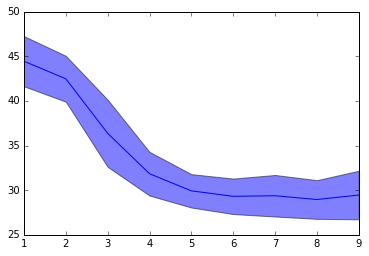

In [35]:
do_kfold(2)

1 29.0470060362 12.1216466225 16.9253594137
2 23.7727679517 7.28049972403 16.4922682277
3 23.0585989259 7.26894607389 15.7896528521
4 22.7211208021 6.80983459667 15.9112862054
5 22.2853699258 7.28280849432 15.0025614314
6 21.7819599968 6.73778566183 15.044174335
7 22.5165227962 6.91149458502 15.6050282112
8 22.4584314224 6.82328269696 15.6351487254
9 22.1118513602 6.35498773172 15.7568636285


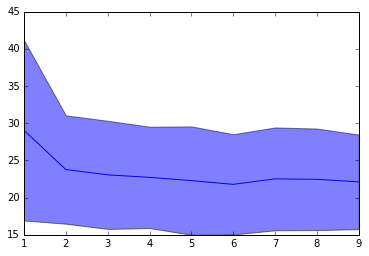

In [36]:
do_kfold(5)

1 25.4512285714 10.5268714758 14.9243570956
2 19.4389455185 7.98111877548 11.457826743
3 20.7824728129 9.56604430022 11.2164285127
4 20.6735238586 9.87796411712 10.7955597415
5 20.660787022 10.2389234375 10.4218635845
6 20.446812367 10.6513355871 9.79547677982
7 20.8432297995 10.9590213156 9.88420848391
8 20.8858066874 10.9864691491 9.89933753833
9 20.8498022081 11.0197163278 9.83008588026


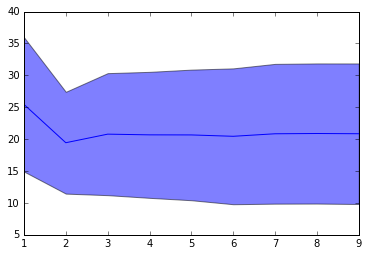

In [37]:
do_kfold(10)

1 23.6652833333 46.819946779 -23.1546634457
2 20.4626911676 42.5777610419 -22.1150698744
3 21.021548663 40.1627833753 -19.1412347124
4 20.4507714027 35.0009360725 -14.5501646698
5 20.9904846726 37.7501758763 -16.7596912037
6 20.3790458537 37.1562419878 -16.777196134
7 20.6923443433 37.5581934793 -16.865849136
8 20.982111415 37.6950736861 -16.7129622711
9 20.8252458045 37.2029087484 -16.377662944


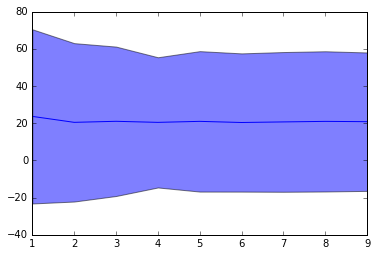

In [38]:
do_kfold(100)

Чем больше фолдов, тем меньше объектов попадает в контроль, тем менее надежно по нему оценивается качество — дисперсия растет

#### Другой датасет

In [39]:
data = pandas.read_csv('http://kdd.ics.uci.edu/databases/tic/ticdata2000.txt', sep='\t', header=None)
X_train, X_test, y_train, y_test = train_test_split(scale(data.iloc[:, 1:-1].astype(np.float)),
                                                    data.iloc[:, -1],
                                                    test_size=0.3)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
search_range = np.arange(5, 71, 5)
for k in search_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    pred = clf.predict_proba(X_test)[:, 1]
    print k, metrics.roc_auc_score(y_test, pred)

5 0.604104715963
10 0.630889446904
15 0.67674122778
20 0.68709387872
25 0.702644882046
30 0.703000066081
35 0.7123972995
40 0.720891429327
45 0.718768585211
50 0.721095178308
55 0.712543227824
60 0.721166765788
65 0.717893015265
70 0.711293200291


In [42]:
from sklearn.cross_validation import StratifiedKFold, StratifiedShuffleSplit

In [43]:
cv = StratifiedShuffleSplit(y_train, n_iter=1, random_state=241, test_size=0.3)
for k in search_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    print k, cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')

5 [ 0.54889231]
10 [ 0.59403731]
15 [ 0.61120892]
20 [ 0.62923024]
25 [ 0.6288818]
30 [ 0.61940043]
35 [ 0.63442024]
40 [ 0.63590571]
45 [ 0.66431314]
50 [ 0.65994841]
55 [ 0.66021738]
60 [ 0.65795555]
65 [ 0.6486698]
70 [ 0.65510686]


In [44]:
def do_kfold(k):
    cv = StratifiedKFold(y_train, n_folds=k, random_state=241)
    scores_mean = []
    scores_std = []
    for k in search_range:
        clf = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')
        scores_mean.append(scores.mean())
        scores_std.append(scores.std())
        print k, scores.mean(), scores.std(), scores.mean() - scores.std()

    x = search_range
    scores_mean = np.array(scores_mean)
    scores_std = np.array(scores_std)
    plt.plot(x, scores_mean)
    plt.fill_between(x, scores_mean - scores_std, scores_mean + scores_std, alpha=0.5)
    plt.show()

5 0.593697226641 0.000896421136353 0.592800805504
10 0.614946801448 0.00216265704487 0.612784144403
15 0.613409130533 0.00739302044733 0.606016110086
20 0.625623418214 0.00291429181524 0.622709126399
25 0.642897454068 0.00901990485033 0.633877549218
30 0.637537389692 0.0146339530504 0.622903436642
35 0.632159141202 0.0141355413399 0.618023599862
40 0.634685870179 0.0122262557967 0.622459614382
45 0.630978222186 0.0191305967455 0.611847625441
50 0.626969840497 0.0235725025474 0.60339733795
55 0.63408113707 0.0195396650813 0.614541471988
60 0.64186744464 0.00925512007119 0.632612324569
65 0.644374634972 0.00650489349342 0.637869741479
70 0.643500053328 0.010549893905 0.632950159423


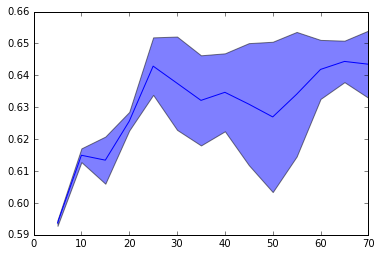

In [45]:
do_kfold(2)

5 0.596975638167 0.0468535463104 0.550122091856
10 0.633900287235 0.0464365492982 0.587463737937
15 0.65567788578 0.0488861098081 0.606791775972
20 0.650181530306 0.0464375977652 0.603743932541
25 0.654207206874 0.0451574947697 0.609049712104
30 0.662695590924 0.049259636271 0.613435954653
35 0.663139904647 0.0348409696607 0.628298934987
40 0.662391151874 0.0338216827075 0.628569469166
45 0.660721686869 0.03564903942 0.625072647449
50 0.668919204192 0.0340127303292 0.634906473863
55 0.661570371517 0.0399706904861 0.621599681031
60 0.660027543574 0.0408762574973 0.619151286077
65 0.660923035442 0.033560863853 0.627362171589
70 0.659111708572 0.0401114514381 0.619000257134


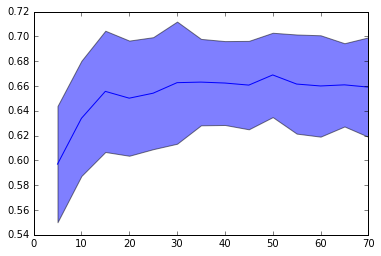

In [46]:
do_kfold(5)

5 0.606763019577 0.0621579498682 0.544605069709
10 0.644342605091 0.0573255605564 0.587017044535
15 0.660363325323 0.0399077711505 0.620455554172
20 0.662618563145 0.0544657152021 0.608152847943
25 0.6684739589 0.0544693676771 0.614004591223
30 0.67286348299 0.0608854710648 0.611978011925
35 0.670304563066 0.0591469049026 0.611157658164
40 0.673768248481 0.050206965593 0.623561282888
45 0.677364706782 0.041332446639 0.636032260143
50 0.682267828766 0.039628975301 0.642638853465
55 0.68228876584 0.0459148161456 0.636373949694
60 0.680094482955 0.0476973729472 0.632397110007
65 0.680044542538 0.0499680302936 0.630076512244
70 0.675026293441 0.0527998217884 0.622226471653


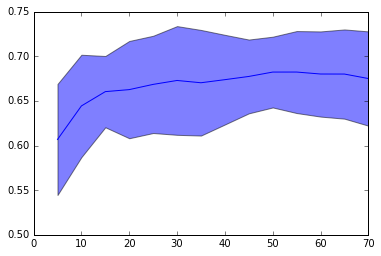

In [47]:
do_kfold(10)

# Отбор признаков

В наших примерах мы будем работать с набором данных, содержащим информацию о случаях сахарного диабета среди индейцев Пима (Pima Indians diabetes). Все признаки являются числовыми, а задача представляет собой двухклассовую классификацию.

### Одномерный отбор признаков

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


В примере ниже используется критерий хи-квадрат (chi-squared test) для неотрицательных признаков, чтобы отобрать 4 лучших признака. Возможно использовать и другие критери. 

In [49]:
# feature extraction

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# summarize scores

print(fit.scores_)


[  111.51969064  1411.88704064    17.60537322    53.10803984  2175.56527292
   127.66934333     5.39268155   181.30368904]


Мы видим оценки для каждого признака и 4 отобранных признака (с наивысшими оценками): plas, test, mass и age.

In [50]:
features = fit.transform(X)

# summarize selected features

print(features[:,:])

[[ 148.     0.    33.6   50. ]
 [  85.     0.    26.6   31. ]
 [ 183.     0.    23.3   32. ]
 ..., 
 [ 121.   112.    26.2   30. ]
 [ 126.     0.    30.1   47. ]
 [  93.     0.    30.4   23. ]]


#### Проверим качество различных моделей при использовании данного набора признаков

In [51]:
model_1=LogisticRegression()
model_2=ExtraTreesClassifier()
model_2=LinearSVC(C=0.005, penalty="l1", dual=False)

In [52]:
# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

dataframe.head()


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Оставим только plas, test, mass и age

In [53]:
select1=dataframe[['plas','test','mass','age','class']]
select1.head()

,plas,test,mass,age,class
0,148,0,33.6,50,1
1,85,0,26.6,31,0
2,183,0,23.3,32,1
3,89,94,28.1,21,0
4,137,168,43.1,33,1


In [54]:
array = select1.values
X = array[:,0:4]
Y = array[:,4]

### Рекурсивное исключение признаков (Del)

In [55]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# load data

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [56]:
# feature extraction

model = LogisticRegression()

rfe = RFE(model, 3)

fit = rfe.fit(X, Y)

print("Num Features: %d") % fit.n_features_

print("Selected Features: %s") % fit.support_

print("Feature Ranking: %s") % fit.ranking_

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


Мы видим, что в результате были отобраны 3 лучших признака: preg, mass, pedi. Отобранные признаки помечены значением «True» в массиве support_ и значением «1» в массиве ranking_.

#### Проверим качество различных моделей при использовании данного набора признаков

In [57]:
model_1=LogisticRegression()
model_2=ExtraTreesClassifier()
model_3=LinearSVC(C=0.005, penalty="l1", dual=False)

In [58]:
# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
select2=dataframe[['preg','mass', 'pedi','class']]
select2.head()

,preg,mass,pedi,class
0,6,33.6,0.627,1
1,1,26.6,0.351,0
2,8,23.3,0.672,1
3,1,28.1,0.167,0
4,0,43.1,2.288,1


In [60]:
array = select2.values
X = array[:,0:3]
Y = array[:,3]

In [61]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score


cv = KFold(n=len(Y), n_folds=5, shuffle=True, random_state=123)
CV1=cross_val_score(model_1, X, Y, cv=cv)
CV2=cross_val_score(model_2, X, Y, cv=cv)
CV3=cross_val_score(model_3, X, Y, cv=cv)

print CV1, mean(CV1)
print CV2, mean(CV2)
print CV3, mean(CV3)

[ 0.69480519  0.68181818  0.7012987   0.69281046  0.70588235] 0.695322977676
[ 0.67532468  0.63636364  0.66233766  0.73856209  0.62091503] 0.666700619642
[ 0.62987013  0.62337662  0.62987013  0.69934641  0.62745098] 0.641982853748


### Отбор на основе важности признаков

Ансамблевые алгоритмы на основе деревьев решений, такие как случайный лес (random forest), позволяют оценить важность признаков.

In [62]:
from sklearn.ensemble import ExtraTreesClassifier

# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [63]:
# feature extraction

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[ 0.11538941  0.22378399  0.0884969   0.0844061   0.08726991  0.14856027
  0.11370912  0.13838429]


#### Проверим качество различных моделей при использовании данного набора признаков

In [64]:
model_1=LogisticRegression()
model_2=ExtraTreesClassifier()
model_3=LinearSVC(C=0.005, penalty="l1", dual=False)

In [65]:
# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
select3=dataframe[['plas', 'mass', 'pedi', 'age', 'class']]
select3.head()

,plas,mass,pedi,age,class
0,148,33.6,0.627,50,1
1,85,26.6,0.351,31,0
2,183,23.3,0.672,32,1
3,89,28.1,0.167,21,0
4,137,43.1,2.288,33,1


In [67]:
array = select3.values
X = array[:,0:4]
Y = array[:,4]

In [68]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score


cv = KFold(n=len(Y), n_folds=5, shuffle=True, random_state=123)
CV1=cross_val_score(model_1, X, Y, cv=cv)
CV2=cross_val_score(model_2, X, Y, cv=cv)
CV3=cross_val_score(model_3, X, Y, cv=cv)

print CV1, mean(CV1)
print CV2, mean(CV2)
print CV3, mean(CV3)

[ 0.77272727  0.77272727  0.73376623  0.77777778  0.80392157] 0.772184025125
[ 0.74675325  0.66233766  0.74025974  0.79738562  0.75816993] 0.740981240981
[ 0.63636364  0.57142857  0.64285714  0.7124183   0.63398693] 0.639410915882


### Метод главных компонент

In [69]:
from sklearn.decomposition import PCA

# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [70]:
# feature extraction

pca = PCA(n_components=3)
fit = pca.fit(X)
features = fit.transform(X)

# summarize components

print("Explained Variance: %s") % fit.explained_variance_ratio_
print(features[:,:])

Explained Variance: [ 0.88854663  0.06159078  0.02579012]
[[-75.71465491  35.95078264  -7.26078895]
 [-82.3582676  -28.90821322  -5.49667139]
 [-74.63064344  67.90649647  19.46180812]
 ..., 
 [ 32.11319827  -3.3766648   -1.58786446]
 [-80.21449431  14.18601977  12.3512639 ]
 [-81.30814972 -21.62149606  -8.15276833]]


#### Проверим качество различных моделей при использовании данного набора признаков

In [71]:
model_1=LogisticRegression()
model_2=ExtraTreesClassifier()
model_3=LinearSVC(C=0.005, penalty="l1", dual=False)

In [72]:
X=features

In [73]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score


cv = KFold(n=len(Y), n_folds=5, shuffle=True, random_state=123)
CV1=cross_val_score(model_1, X, Y, cv=cv)
CV2=cross_val_score(model_2, X, Y, cv=cv)
CV3=cross_val_score(model_3, X, Y, cv=cv)

print CV1, mean(CV1)
print CV2, mean(CV2)
print CV3, mean(CV3)

[ 0.75974026  0.74675325  0.68181818  0.75816993  0.73856209] 0.737008742891
[ 0.74675325  0.6038961   0.68831169  0.76470588  0.71895425] 0.704524233936
[ 0.77272727  0.71428571  0.70779221  0.73856209  0.73202614] 0.73307868602


### L1-регуляризация

In [74]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X.shape

(768, 8)

In [75]:
lsvc = LinearSVC(C=0.005, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(768, 5)

#### Проверим качество различных моделей при использовании данного набора признаков

In [76]:
model_1=LogisticRegression()
model_2=ExtraTreesClassifier()
model_3=LinearSVC(C=0.005, penalty="l1", dual=False)

In [77]:
X=X_new

In [78]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score


cv = KFold(n=len(Y), n_folds=5, shuffle=True, random_state=123)
CV1=cross_val_score(model_1, X, Y, cv=cv)
CV2=cross_val_score(model_2, X, Y, cv=cv)
CV3=cross_val_score(model_3, X, Y, cv=cv)

print CV1, mean(CV1)
print CV2, mean(CV2)
print CV3, mean(CV3)

[ 0.79220779  0.75324675  0.69480519  0.77124183  0.78431373] 0.759163059163
[ 0.77922078  0.70779221  0.71428571  0.74509804  0.75816993] 0.740913335031
[ 0.69480519  0.62987013  0.64935065  0.7254902   0.68627451] 0.677158135982
